### ROC and AUC for Binary Classifier

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=80000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train,
                                                            y_train, test_size=0.5)

In [3]:
X_train_lr.shape

(20000, 20)

In [7]:
y_train.shape

(20000,)

### Build and train Keras model

In [9]:
from keras.models import Sequential
from keras.layers import Dense

def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=20, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

from keras.wrappers.scikit_learn import KerasClassifier
keras_model = build_model()
keras_model.fit(X_train, y_train, epochs=5, batch_size=100, verbose=1)

Epoch 1/5
20000/20000 [==============================] - 2s 81us/step - loss: 0.4563 - acc: 0.7761
Epoch 2/5
20000/20000 [==============================] - 1s 64us/step - loss: 0.3129 - acc: 0.8659
Epoch 3/5
20000/20000 [==============================] - 1s 60us/step - loss: 0.3041 - acc: 0.8701
Epoch 4/5
20000/20000 [==============================] - 1s 60us/step - loss: 0.2991 - acc: 0.8714
Epoch 5/5
20000/20000 [==============================] - 1s 60us/step - loss: 0.2937 - acc: 0.8734


We then call model.predict on the reserved test data to generate the probability values. After that, use the probabilities and ground true labels to generate two data array pairs necessary to plot ROC curve:

    fpr: False positive rates for each possible threshold
    tpr: True positive rates for each possible threshold

We can call sklearn’s roc_curve() function to generate the two. Here is the code to make them happen.

In [10]:
from sklearn.metrics import roc_curve
y_pred_keras = keras_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [13]:
thresholds_keras

array([9.9999964e-01, 9.9999011e-01, 9.9998879e-01, ..., 3.9217207e-03,
       3.9214636e-03, 1.2995956e-04], dtype=float32)

In [14]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

To make the plot looks more meaningful, let’s train another binary classifier and compare it with our Keras classifier later in the same plot.

In [15]:
from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

### Let's plot ROC curve for two classifiers

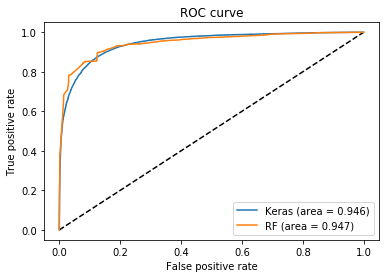

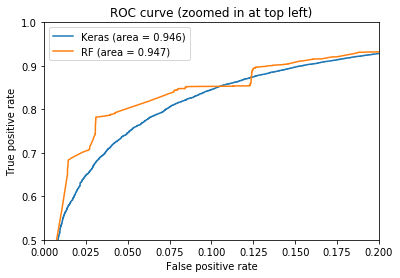

In [20]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.5, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

### ROC and AUC for categotical classifier
ROC curve extends to problems with three or more classes with what is known as the one-vs-all approach.

For instance, if we have three classes, we will create three ROC curves,

For each class, we take it as the positive class and group the rest classes jointly as the negative class.

    Class 1 vs classes 2&3
    Class 2 vs classes 1&3
    Class 3 vs classes 1&2

In [21]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
# 3 classes to classify
n_classes = 3

X, y = make_classification(n_samples=80000, n_features=20, n_informative=3, n_redundant=0, n_classes=n_classes,
    n_clusters_per_class=2)
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [28]:
y_train

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [29]:
from keras.models import Sequential
from keras.layers import Dense

def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=20, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

keras_model2 = build_model()
keras_model2.fit(X_train, y_train, epochs=10, batch_size=100, verbose=1)

Epoch 1/10
40000/40000 [==============================] - 3s 77us/step - loss: 0.7730 - acc: 0.6538
Epoch 2/10
40000/40000 [==============================] - 2s 62us/step - loss: 0.4267 - acc: 0.8281
Epoch 3/10
40000/40000 [==============================] - 2s 60us/step - loss: 0.3713 - acc: 0.8558
Epoch 4/10
40000/40000 [==============================] - 2s 62us/step - loss: 0.3471 - acc: 0.8678
Epoch 5/10
40000/40000 [==============================] - 2s 60us/step - loss: 0.3328 - acc: 0.8719
Epoch 6/10
40000/40000 [==============================] - 2s 62us/step - loss: 0.3209 - acc: 0.8778
Epoch 7/10
40000/40000 [==============================] - 2s 60us/step - loss: 0.3102 - acc: 0.8824
Epoch 8/10
40000/40000 [==============================] - 2s 62us/step - loss: 0.2995 - acc: 0.8866
Epoch 9/10
40000/40000 [==============================] - 2s 60us/step - loss: 0.2905 - acc: 0.8922
Epoch 10/10
40000/40000 [==============================] - 2s 62us/step - loss: 0.2827 - acc: 0.8963

In [31]:
y_score = keras_model2.predict(X_test)

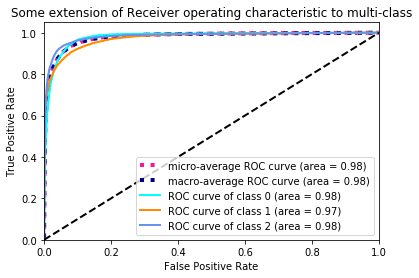

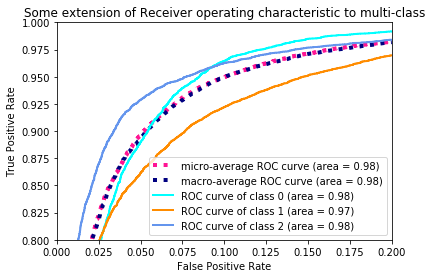

In [32]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()